In [339]:
import pandas as pd
import numpy as np
import seaborn as sns

In [340]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [341]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [342]:
df.shape

(5572, 5)

#### 1. Data cleaning
#### 2. EDA
#### 3. Text Preprocessing
#### 4. Model building
#### 5. Evaluation
#### 6. Improvement
#### 7. Website
#### 8. Deploy

## 1. Data cleaning

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [344]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [345]:
## IN Unnamed 2, 3, 4 there is lots of nun values so we can drop it
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [346]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [347]:
## renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [348]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [349]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [350]:
# lable 0 --> ham, 1 ---> spam
df['target'] = encoder.fit_transform(df['target'])

In [351]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [352]:
## missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [353]:
## Check duplicate values
df.duplicated().sum()

np.int64(403)

In [354]:
df.shape

(5572, 2)

In [355]:
## drop duplicate values
df = df.drop_duplicates(keep="first")

In [356]:
df.shape

(5169, 2)

In [357]:
## Check duplicate values
df.duplicated().sum()

np.int64(0)

## 2. Eda

In [358]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

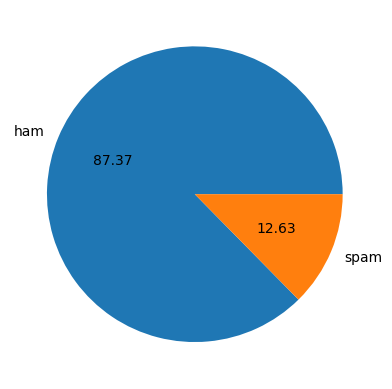

In [359]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct= '%0.2f')
plt.show()

In [360]:
## Our data is imbalanced

In [361]:
import nltk

In [362]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/priyanshuyadav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [363]:
## count number of text in per message and show in num_characters
df['num_characters'] = df['text'].apply(len)

In [364]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [365]:
## num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [366]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [367]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [368]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [369]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [370]:
# ham data describe
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [371]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [372]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

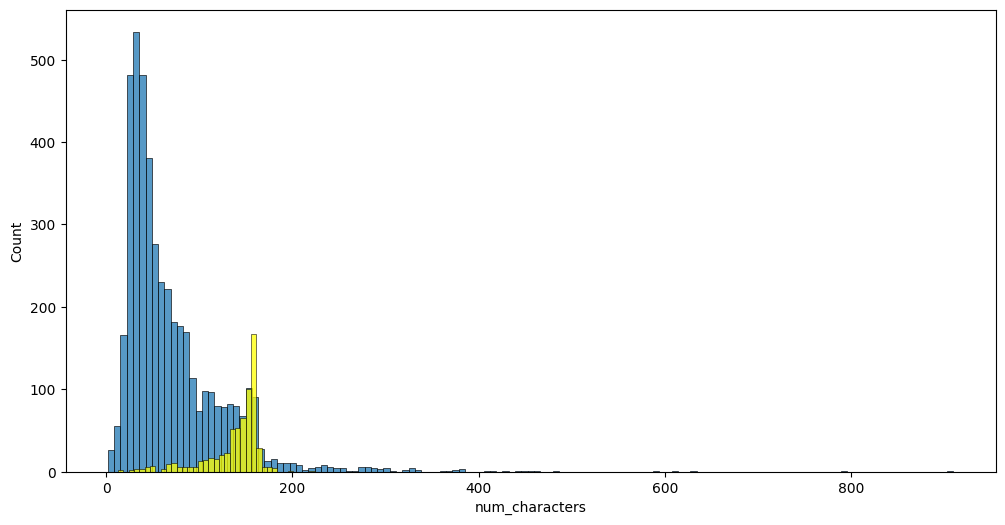

In [373]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='yellow')

<Axes: xlabel='num_words', ylabel='Count'>

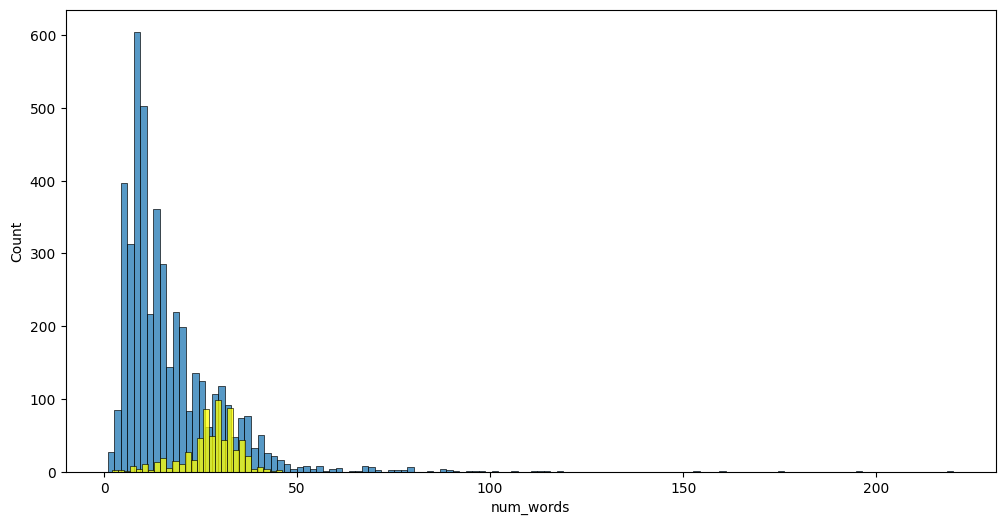

In [374]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='yellow')
## 0 --> ham,  1 --> spam

/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/scipy/_lib/_util.py:1280: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/scipy/_lib/_util.py:1280: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/scipy/_lib/_util.py:1280: RuntimeWarning: invalid value encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/scipy/_lib/_util.py:1280: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/scipy/_lib/_util.py:1280: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/opt/homebrew/Cask

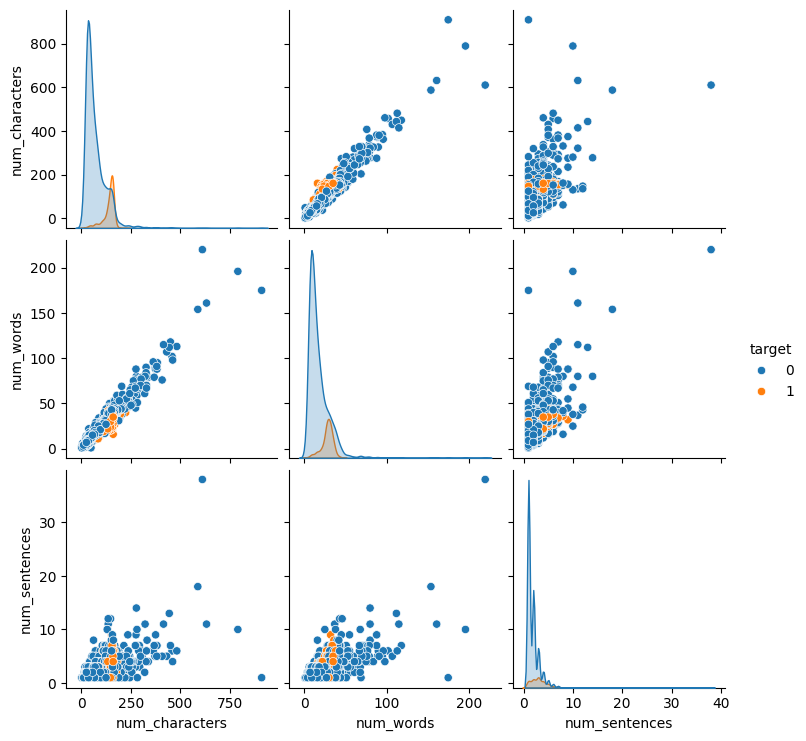

In [375]:
sns.pairplot(df,hue='target')

<Axes: >

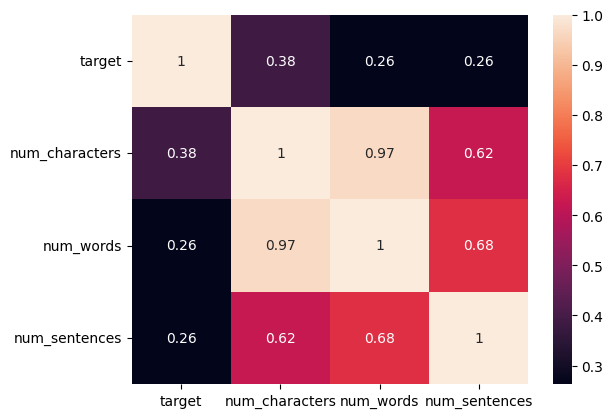

In [376]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

### 3. Data Preprocessing
* Lower case
* Tokenization
* Remove special characters
* Remove stop words and punctuation
* stemming

In [377]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

def transform_text(text):
    """
    This function:
    1. Converts text to lowercase
    2. Tokenizes the text
    3. Removes punctuation & special characters
    4. Removes English stopwords
    5. Applies Snowball stemming
    6. Returns a cleaned string (ready for ML models)
    """

    # Convert to lowercase
    text = text.lower()

    # Tokenize text
    tokens = nltk.word_tokenize(text)

    # Load stopwords and stemmer
    stop_words = set(stopwords.words('english'))
    stemmer = SnowballStemmer('english')

    cleaned_words = []

    for word in tokens:
        # Keep only alphanumeric words
        if word.isalnum():
            # Remove stopwords
            if word not in stop_words:
                # Apply Snowball stemming
                cleaned_words.append(stemmer.stem(word))

    # Convert list of words to a single string
    return " ".join(cleaned_words)

In [378]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [379]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [380]:
df['transformed_text']=df['text'].apply(transform_text)

In [381]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [382]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [383]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

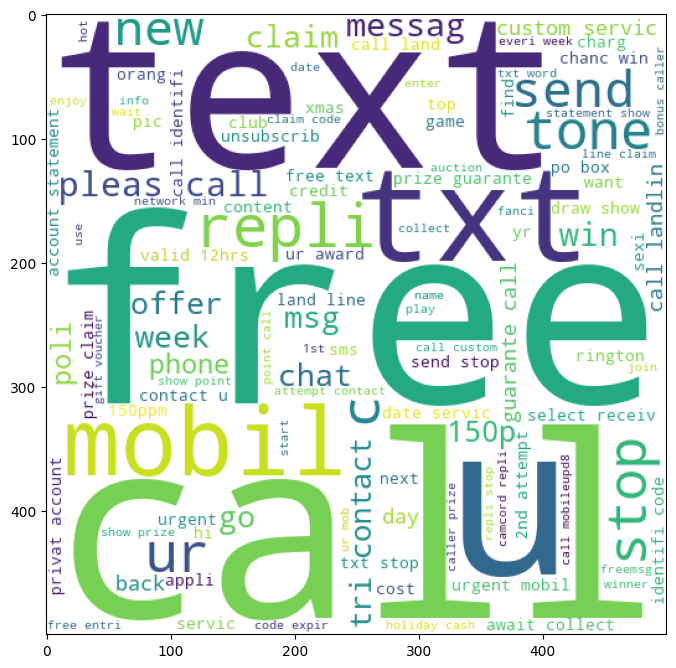

In [384]:
plt.figure(figsize=(8,11))
plt.imshow(spam_wc) ## most fequent words use in spam

In [385]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

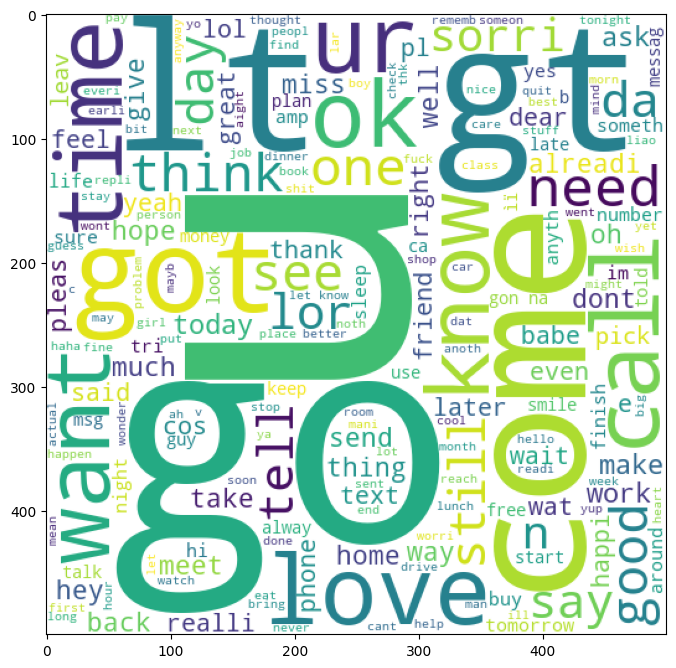

In [386]:
plt.figure(figsize=(8,11))
plt.imshow(ham_wc) ## most fequent words use in ham

In [387]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [388]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [389]:
len(spam_corpus)

9939

/var/folders/my/6drnfy_n1pn29q2ftc3wpjzr0000gn/T/ipykernel_7773/2814917369.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=most_common,palette='tab20')


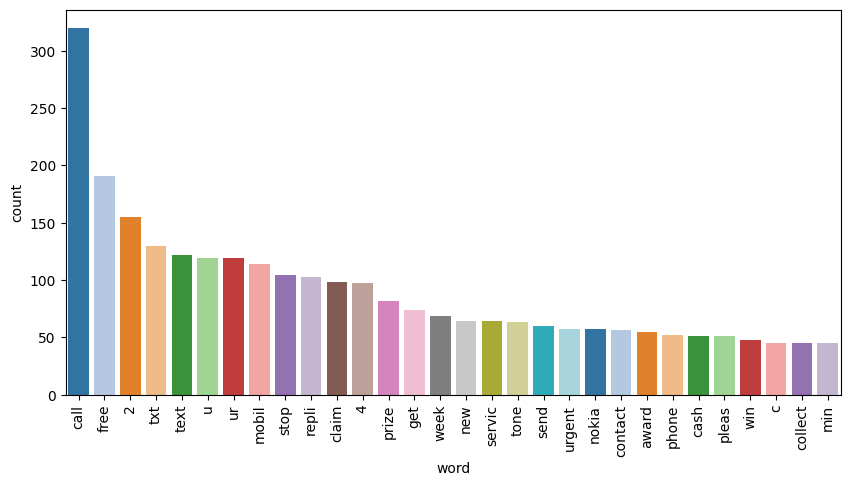

In [390]:
## show top 30 words which use most frequency
from collections import Counter
most_common = pd.DataFrame(Counter(spam_corpus).most_common(30))
most_common.columns = ['word', 'count']
plt.figure(figsize=(10,5))
sns.barplot(x='word', y='count', data=most_common,palette='tab20')
plt.xticks(rotation=90)
plt.show()

In [391]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

/var/folders/my/6drnfy_n1pn29q2ftc3wpjzr0000gn/T/ipykernel_7773/3167423294.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=most_common,palette='tab20')


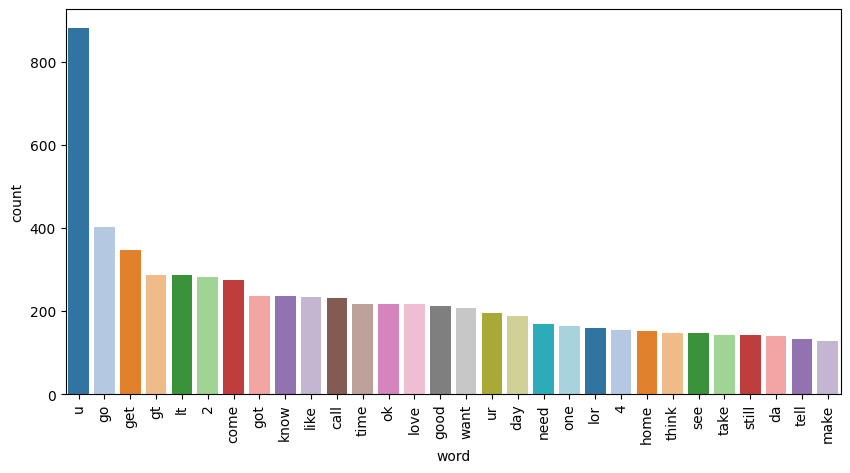

In [392]:
## show top 30 words which use most frequency
from collections import Counter
most_common = pd.DataFrame(Counter(ham_corpus).most_common(30))
most_common.columns = ['word', 'count']
plt.figure(figsize=(10,5))
sns.barplot(x='word', y='count', data=most_common,palette='tab20')
plt.xticks(rotation=90)
plt.show()

In [393]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### 4. Model Building

###  Sentences converted into vector

In [394]:
## basically we can use bag of words to vectrized our models
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [395]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [396]:
## Scalling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [397]:
X.shape

(5169, 3000)

In [398]:
y = df['target'].values

In [399]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.2, random_state=2)

In [400]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [401]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [402]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.879110251450677
[[785 111]
 [ 14 124]]
0.5276595744680851


In [403]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9777562862669246
[[888   8]
 [ 15 123]]
0.9389312977099237


/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: Runtim

In [404]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9777562862669246
[[888   8]
 [ 15 123]]
0.9389312977099237


/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: Runtim

In [405]:
## tfid --> mnb

In [406]:
## checking which model is perform best accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [407]:
lrc = LogisticRegression(solver="liblinear", penalty='l1')
svc = SVC(kernel="sigmoid", gamma=1.0)
naive = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [408]:
clfs = {
    'lr' : lrc,
    'SVC' : svc,
    'naive' : naive,
    'DT' : dtc,
    'KN' : knc,
    'AdaBost' : abc,
    'Bgc' : bc,
    "ETC": etc,
    'GBDT' : gbc,
    'RFC' : rfc,
    'XGB' : xgb
}

In [409]:
## Train all algorithm
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy, precision

In [410]:
train_classifier(lrc,X_train,y_train,X_test,y_test)

/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


(0.9661508704061895, 0.963963963963964)

In [411]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

    print("for ",name)
    print("accuracy -- ", current_accuracy)
    print("Precision -- ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for  lr
accuracy --  0.9661508704061895
Precision --  0.963963963963964


/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


for  SVC
accuracy --  0.9700193423597679
Precision --  0.9421487603305785
for  naive
accuracy --  0.9777562862669246
Precision --  0.9389312977099237
for  DT
accuracy --  0.9313346228239845
Precision --  0.8252427184466019


/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: Runtim

for  KN
accuracy --  0.9052224371373307
Precision --  0.9761904761904762
for  AdaBost
accuracy --  0.9245647969052224
Precision --  0.8409090909090909
for  Bgc
accuracy --  0.9574468085106383
Precision --  0.8615384615384616
for  ETC
accuracy --  0.9796905222437138
Precision --  0.975609756097561
for  GBDT
accuracy --  0.9477756286266924
Precision --  0.9375
for  RFC
accuracy --  0.9748549323017408
Precision --  0.9745762711864406
for  XGB
accuracy --  0.9680851063829787
Precision --  0.9565217391304348


In [412]:
performance_df  = pd.DataFrame({
    "Algorithm": clfs.keys(),
    "Accuracy": accuracy_scores,
    "Prescision": precision_scores
})

sorted_df = performance_df.sort_values(
    by=["Prescision", "Accuracy"],
    ascending=False
)

print(sorted_df)

   Algorithm  Accuracy  Prescision
4         KN  0.905222    0.976190
7        ETC  0.979691    0.975610
9        RFC  0.974855    0.974576
0         lr  0.966151    0.963964
10       XGB  0.968085    0.956522
1        SVC  0.970019    0.942149
2      naive  0.977756    0.938931
8       GBDT  0.947776    0.937500
6        Bgc  0.957447    0.861538
5    AdaBost  0.924565    0.840909
3         DT  0.931335    0.825243


In [413]:
performance_df1 = pd.melt(performance_df, id_vars= "Algorithm")

In [414]:
performance_df1

,Algorithm,variable,value
0,lr,Accuracy,0.966151
1,SVC,Accuracy,0.970019
2,naive,Accuracy,0.977756
3,DT,Accuracy,0.931335
4,KN,Accuracy,0.905222
5,AdaBost,Accuracy,0.924565
6,Bgc,Accuracy,0.957447
7,ETC,Accuracy,0.979691
8,GBDT,Accuracy,0.947776
9,RFC,Accuracy,0.974855


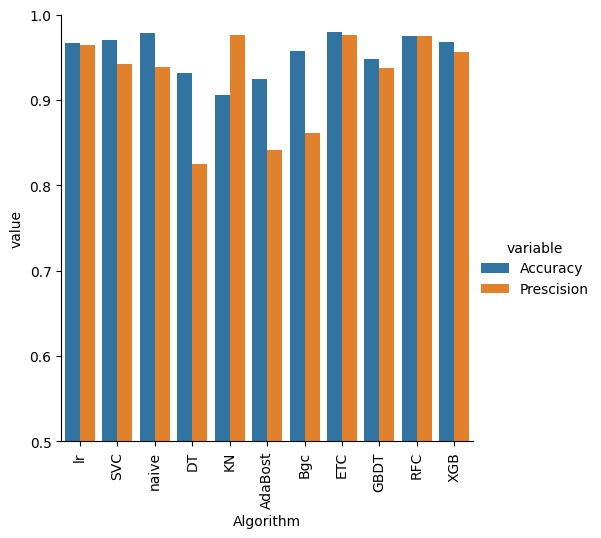

In [415]:
sns.catplot(x = "Algorithm", y = "value",
            hue = "variable", data=performance_df1,kind ='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation="vertical")
plt.show()

### Model Improve

In [416]:
## 1. change the max_features parameter of tfidf

In [421]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_max_ft_3000':accuracy_scores,'precision_max_ft_3000':precision_scores})

In [422]:
performance_df.merge(temp_df, on="Algorithm")

,Algorithm,Accuracy,Prescision,Accuracy_max_ft_3000,precision_max_ft_3000
0,lr,0.966151,0.963964,0.966151,0.963964
1,SVC,0.970019,0.942149,0.970019,0.942149
2,naive,0.977756,0.938931,0.977756,0.938931
3,DT,0.931335,0.825243,0.931335,0.825243
4,KN,0.905222,0.976190,0.905222,0.976190
5,AdaBost,0.924565,0.840909,0.924565,0.840909
6,Bgc,0.957447,0.861538,0.957447,0.861538
7,ETC,0.979691,0.975610,0.979691,0.975610
8,GBDT,0.947776,0.937500,0.947776,0.937500
9,RFC,0.974855,0.974576,0.974855,0.974576


In [ ]:
## Voting Classifier 
## combination of multiple algorithms
svc = SVC(kernel="sigmoid", gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [425]:
voting = VotingClassifier(estimators=[('svc',svc), ('nb', mnb), ('et',etc)], voting="soft")

In [426]:
voting.fit(X_train,y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


,estimators,"[('svc', ...), ('nb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0
,coef0,0.0


In [428]:
y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(y_pred,y_test))
print("precision", precision_score(y_pred,y_test))

Accuracy 0.9806576402321083
precision 0.8840579710144928


/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [429]:
## Applying stacking
estimators = [('svc', svc), ('nb', mnb), ('et',etc)]
final_estimators = RandomForestClassifier()

In [430]:
from sklearn.ensemble import StackingClassifier

In [431]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimators)

In [433]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(y_pred,y_test))
print("precision", precision_score(y_pred,y_test))

/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: Runtim

Accuracy 0.9816247582205029
precision 0.9057971014492754


/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


### We can chose  ExtraTreesClassifier algorithm

In [434]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(etc, open('model.pkl','wb'))